In [20]:
import json
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

eegdatasets_df = pd.read_csv("../data/data_noerror.csv", sep=";", header=0)

In [21]:
eegdatasets_df.columns

Index(['ID', 'Dataset reference', 'Publication reference(s)',
       'Dataset full citation', 'Dataset name', 'Link to dataset',
       'Access type', 'Country', 'Year Publication', 'Condition / focus',
       'Condition / focus (more)', 'Data modalities contained',
       'Data modalities contained (cleaned)', 'Collected where? (site)',
       'Ethics', 'Population', 'Number of subjects', '# of classes',
       'Dataset explanation? (how to use, what is in it, README file, etc)',
       'Data collection protocol presented?', 'Data: demographic',
       'Data: clinical history', 'Data: psychometric / psychological',
       'Data: physiological', 'Data: other', 'Notes', 'Device used',
       'Form factor', 'Number of channels', 'Electrodes location',
       'Sampling frequency (Hz)', 'Format', 'Number of recording sessions',
       'Type of recording (resting, EVP, etc)', 'Recording protocol available',
       'Epochs / time / trials /etc', 'Annotation / Ground-truth',
       'EEG data 

# Research Questions
1. Which datasets are available for EEG in healthcare settings?
2. Which health conditions are covered?
3. How reusable is the dataset?

Subquestions:
- What are the associated data modalities to EEG? (e.g., EMG, video, etc)
- Does the dataset include the data collection protocol?
- Does the dataset include an explanation on how to use it (e.g., does it explains what are the variables and possible values, any preprocessing done, code used for analysis, etc)
- Are the formats used easy to open? (Or are they proprietary?) Are they commonly used? 
- What are the licenses (if any)?

**to do**
- get licences for each dataset

## RQ1 - Which datasets are available with EEG data in healthcare?

They have been collected and identified in the .csv (and .xlsx) file

## RQ2 - Which health conditions are covered in these datasets?

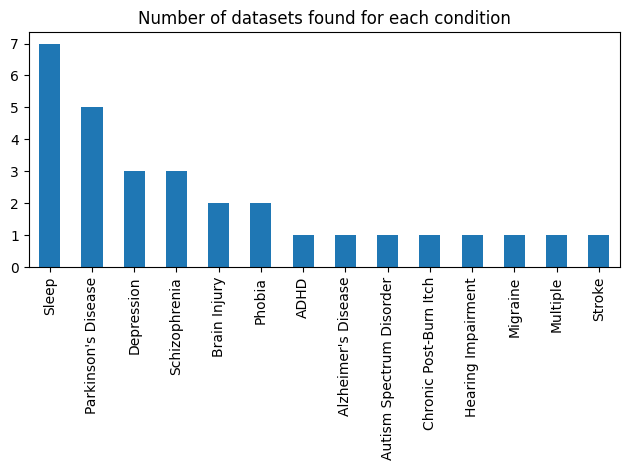

In [22]:
eegdatasets_df['Condition / focus'].value_counts().plot(kind='bar')
plt.title('Number of datasets found for each condition')
plt.tight_layout()
plt.savefig("figs/conditions.pdf")
plt.show()

In [23]:
countries_count = {}
for entry in eegdatasets_df['Country']:
    countries = entry.split(',')
    for country in countries:
        country = country.strip()
        if country in countries_count:
            countries_count[country] += 1
        else:
            countries_count[country] = 1
# print(countries_count)


# sort by value
countries_count = {k: v for k, v in sorted(countries_count.items(), key=lambda item:item[1], reverse=True)}



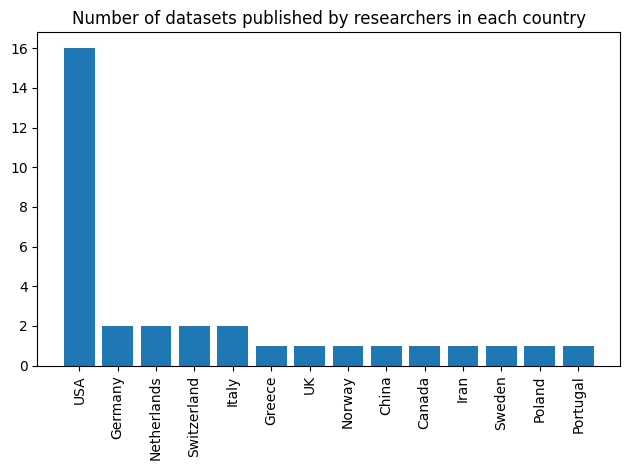

In [24]:
# plot

fig, axs = plt.subplots()
axs.bar(list(countries_count.keys()), list(countries_count.values()))
plt.xticks(rotation=90)
plt.title("Number of datasets published by researchers in each country")
plt.tight_layout()
plt.savefig("figs/countries.pdf")
plt.show()

**Sub-question**: What are the data modalities associated with EEG?

In [25]:
modalities = {}
for entry in eegdatasets_df['Data modalities contained (cleaned)']:
    mds = [m.strip() for m in entry.replace('(',',').replace(')', ',').split(',')]
    for m in mds:
        if m in modalities:
            modalities[m] += 1
        else:
            modalities[m] = 1

print(modalities)

{'EEG': 30, 'audio': 1, 'MEG': 1, 'MRI': 1, 'EMG': 6, 'EOG': 4, 'respiratory': 3, 'SaO2': 3, 'ECG': 5, 'snore': 1, 'airflow': 2, 'body position': 1, 'CO2 measurement': 1, 'video': 1, 'fMRI': 2, 'actigraphy': 1}


In [26]:
del modalities['EEG']
modalities = {k: v for k, v in sorted(modalities.items(), key=lambda item:item[1], reverse=True)}

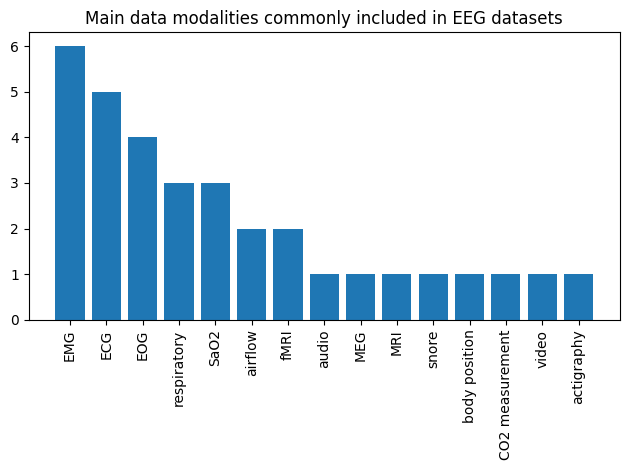

In [27]:
fig, axs = plt.subplots()
axs.bar(list(modalities.keys()), list(modalities.values()))
plt.xticks(rotation=90)
plt.title("Main data modalities commonly included in EEG datasets")
plt.tight_layout()
plt.savefig("figs/modalities.pdf")
plt.show()

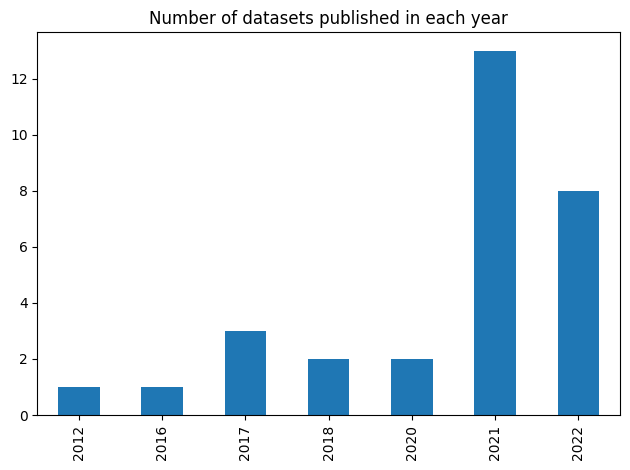

In [28]:
eegdatasets_df.sort_values('Year Publication')['Year Publication'].value_counts(sort=False).plot(kind='bar')
plt.title('Number of datasets published in each year')
plt.tight_layout()
plt.savefig("figs/years.pdf")
plt.show()

## RQ3 - How reusable are the datasets?

**Sub-questions**:
- RQ3.1 - Is the dataset FAIR?
- RQ3.2 - Does the dataset include the data collection protocol (including ethics, where and how it was collected, protocol and procedures for any tasks/stimulations)?
- RQ3.3 - Does the dataset include explanations on how to use it (e.g., does it explains what are the variables and possible values, any preprocessing done, code used for analysis, etc) ?
- RQ3.4 - Are the formats used easy/free to open? (Or are they proprietary?) Are they commonly used in EEG research? 
- RQ3.5 - What are the licenses (if any) of the datasets?


In [29]:
# doi_t = eegdatasets_df['Dataset_DOI'][1]
doi_t = "10.5281/zenodo.3257758"

In [30]:
doi_metadata_file = open("../data/metadata/" + doi_t.replace("/", "_") + ".json")

FileNotFoundError: [Errno 2] No such file or directory: '../data/metadata/10.5281_zenodo.3257758.json'

In [ ]:
doi_metadata_text = doi_metadata_file.read()

In [ ]:
from io import StringIO

In [ ]:
json_pd = pd.read_json(StringIO(doi_metadata_text))
metadata = json_pd.iloc[0]['metadata']
metadata['metadata']['object_content_identifier']


[{'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S01.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S02.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S03.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S04.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S05.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S06.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S07.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/ABI_S08.zip'},
 {'type': 'zip',
  'url': 'https://zenodo.org/api/files/77a1ecbb-8078-4b80-9094-9f92a0e400a6/control_S01.zip'},
 {'type': 'zip',
  'url'